In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
seq = np.array([.1, .2 , .3, .4, .5, .6, .7, .8, .9])
print(seq)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [3]:
time_steps = len(seq)
print(time_steps)

samples = 1 # batch_size
features = 1 # n_input
hidden_layer = 100
epochs = 300

9


In [4]:
seq = seq.reshape(samples, time_steps, features)
print(seq)

[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [5]:
model = Sequential()
model.add(LSTM(hidden_layer, activation='relu', input_shape=(time_steps, features)))
model.add(RepeatVector(time_steps))
model.add(LSTM(hidden_layer, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [6]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(seq, seq, epochs=epochs, verbose=0)

result = model.evaluate(seq, seq)
print("\nTraining accuracy:", result[1])

1/1 [==============================] - 0s 107ms/step

Training accuracy: 0.0


In [7]:
yhat = model.predict(seq, verbose=0)
print(yhat)

[[[0.11095392]
  [0.20698541]
  [0.3031387 ]
  [0.39960098]
  [0.49677506]
  [0.59524095]
  [0.695502  ]
  [0.7986028 ]
  [0.905728  ]]]


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 9, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


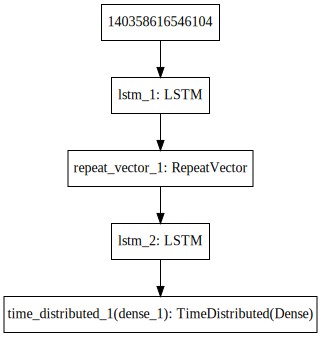

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

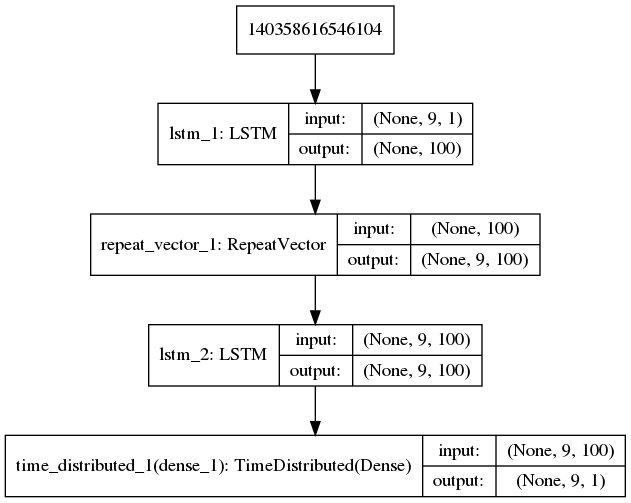

In [10]:
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
Image(retina=True, filename='reconstruct_lstm_autoencoder.png')

In [11]:
model.input

<tf.Tensor 'lstm_1_input:0' shape=(?, 9, 1) dtype=float32>

In [16]:
model.layers

In [18]:
model.layers[0].input

<tf.Tensor 'lstm_1_input:0' shape=(?, 9, 1) dtype=float32>

In [19]:
model.layers[0].output

<tf.Tensor 'lstm_1/TensorArrayReadV3:0' shape=(?, 100) dtype=float32>